# Clustering Assignment - Crime Data
## -----------------------------------------------------------------------------------------------------------------------------
## Problem Statement : Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences. 

## 1. Import Important Libraries:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset :

In [2]:
crime_data = pd.read_csv('crime_data.csv',sep=',')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## 3. Data Understanding : 

### 3.1 Data Description:

* **Murder** -- Muder rates in different places of United States
* **Assualt**- Assualt rate in different places of United States
* **UrbanPop** - urban population in different places of United States
* **Rape** - Rape rate in different places of United States

### 3.2 Initial Analysis :

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

## 4. Data Preparation :

In [6]:
# Renaming columns :

crime_data.columns =['place_name','murder','assault','urban_pop','rape']
crime_data.head()

,place_name,murder,assault,urban_pop,rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [7]:
del crime_data['place_name']
crime_data.head()

,murder,assault,urban_pop,rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## 5. Data Pre-Processing:

In [8]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_crime_data = std_scaler.fit_transform(crime_data)
scaled_crime_data_df = pd.DataFrame(scaled_crime_data,columns=crime_data.columns)
scaled_crime_data_df

,murder,assault,urban_pop,rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## 6. Hierarchical Clustering
### 6.1 Creating Dendograms :

In [9]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

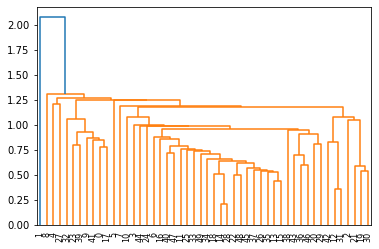

In [10]:
#Creating dendogram to see the clustering model

dendogram_1 = sch.dendrogram(sch.linkage(scaled_crime_data_df, method='single'))

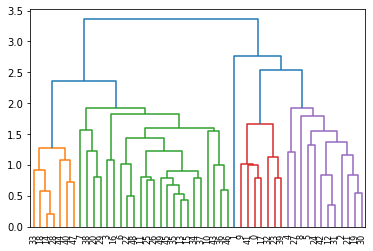

In [11]:
dendogram_2 = sch.dendrogram(sch.linkage(scaled_crime_data_df, method='average'))

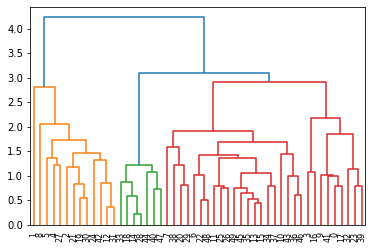

In [12]:
dendogram_3 = sch.dendrogram(sch.linkage(scaled_crime_data_df, method='weighted'))

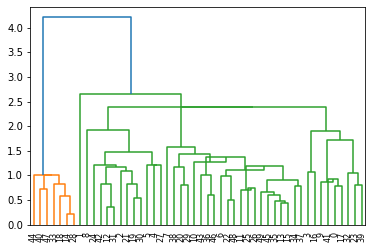

In [13]:
dendogram_4 = sch.dendrogram(sch.linkage(scaled_crime_data_df, method='median'))

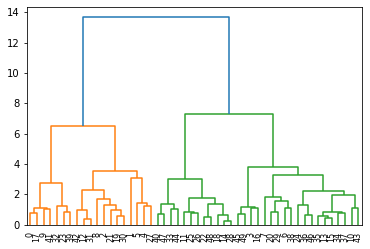

In [14]:
dendogram_5 = sch.dendrogram(sch.linkage(scaled_crime_data_df, method='ward'))

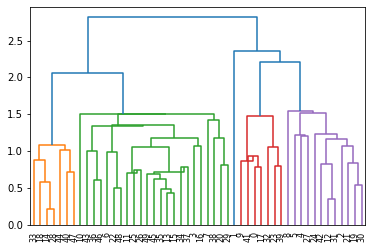

In [15]:
dendogram_6 = sch.dendrogram(sch.linkage(scaled_crime_data_df, method='centroid'))

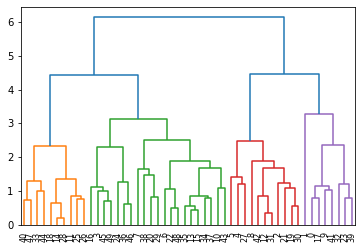

In [16]:
dendogram_7 = sch.dendrogram(sch.linkage(scaled_crime_data_df, method='complete'))

### 6.2 Creating Clusters :

In [17]:
hc_1 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
hc_1

AgglomerativeClustering(linkage='single', n_clusters=4)

In [18]:
hc_2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
hc_2

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [19]:
hc_3 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc_3

AgglomerativeClustering(n_clusters=3)

In [20]:
hc_4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')
hc_4

AgglomerativeClustering(linkage='average', n_clusters=5)

In [21]:
hc_5 = AgglomerativeClustering(n_clusters=4, affinity = 'manhattan', linkage = 'single')
hc_5

AgglomerativeClustering(affinity='manhattan', linkage='single', n_clusters=4)

In [22]:
hc_6 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')
hc_6

AgglomerativeClustering(linkage='single', n_clusters=3)

### 6.3 Predicting the clusters :

In [23]:
y_hc_1 = hc_1.fit_predict(scaled_crime_data_df)
y_hc_1

array([0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
y_hc_2 = hc_2.fit_predict(scaled_crime_data_df)
y_hc_2

array([1, 4, 2, 0, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2,
       0, 1, 0, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 0, 0], dtype=int64)

In [25]:
y_hc_3 = hc_3.fit_predict(scaled_crime_data_df)
y_hc_3

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [26]:
y_hc_4 = hc_4.fit_predict(scaled_crime_data_df)
y_hc_4

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 0, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       0, 3, 1, 0, 0, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 0, 0], dtype=int64)

In [27]:
y_hc_5 = hc_5.fit_predict(scaled_crime_data_df)
y_hc_5

array([0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
y_hc_6 = hc_6.fit_predict(scaled_crime_data_df)
y_hc_6

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

### 6.4 Dataframing the cluster predictions :

In [29]:
Clusters_1=pd.DataFrame(y_hc_1,columns=['Clusters'])
Clusters_1

,Clusters
0,0
1,3
2,0
3,0
4,1
5,0
6,0
7,0
8,2
9,0


In [30]:
Clusters_2=pd.DataFrame(y_hc_2,columns=['Clusters'])
Clusters_2

,Clusters
0,1
1,4
2,2
3,0
4,2
5,2
6,0
7,0
8,2
9,1


In [31]:
Clusters_3=pd.DataFrame(y_hc_3,columns=['Clusters'])
Clusters_3

,Clusters
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,1
8,0
9,0


In [32]:
Clusters_4=pd.DataFrame(y_hc_4,columns=['Clusters'])
Clusters_4

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [33]:
Clusters_5=pd.DataFrame(y_hc_5,columns=['Clusters'])
Clusters_5

,Clusters
0,0
1,3
2,0
3,0
4,1
5,0
6,0
7,0
8,2
9,0


In [34]:
Clusters_6=pd.DataFrame(y_hc_6,columns=['Clusters'])
Clusters_6

,Clusters
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,2
9,0


### 6.5 Attaching cluster predictions to the original dataframe :

In [35]:
crime_data_copy = crime_data.copy()
crime_data_copy.head()

,murder,assault,urban_pop,rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [36]:
crime_data_copy['cluster_1'] = Clusters_1
crime_data_copy['cluster_2'] = Clusters_2
crime_data_copy['cluster_3'] = Clusters_3
crime_data_copy['cluster_4'] = Clusters_4
crime_data_copy['cluster_5'] = Clusters_5
crime_data_copy['cluster_6'] = Clusters_6
crime_data_copy

,murder,assault,urban_pop,rape,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,13.2,236,58,21.2,0,1,0,3,0,0
1,10.0,263,48,44.5,3,4,0,2,3,1
2,8.1,294,80,31.0,0,2,0,1,0,0
3,8.8,190,50,19.5,0,0,1,0,0,0
4,9.0,276,91,40.6,1,2,0,1,1,0
5,7.9,204,78,38.7,0,2,0,1,0,0
6,3.3,110,77,11.1,0,0,1,0,0,0
7,5.9,238,72,15.8,0,0,1,0,0,0
8,15.4,335,80,31.9,2,2,0,1,2,2
9,17.4,211,60,25.8,0,1,0,3,0,0


In [37]:
crime_data_copy[crime_data_copy['cluster_1'] == 0 ]

,murder,assault,urban_pop,rape,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,13.2,236,58,21.2,0,1,0,3,0,0
2,8.1,294,80,31.0,0,2,0,1,0,0
3,8.8,190,50,19.5,0,0,1,0,0,0
5,7.9,204,78,38.7,0,2,0,1,0,0
6,3.3,110,77,11.1,0,0,1,0,0,0
7,5.9,238,72,15.8,0,0,1,0,0,0
9,17.4,211,60,25.8,0,1,0,3,0,0
10,5.3,46,83,20.2,0,0,1,0,0,0
11,2.6,120,54,14.2,0,3,2,0,0,0
12,10.4,249,83,24.0,0,2,0,1,0,0


In [38]:
crime_data_copy[crime_data_copy['cluster_2'] == 1]

,murder,assault,urban_pop,rape,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6
0,13.2,236,58,21.2,0,1,0,3,0,0
9,17.4,211,60,25.8,0,1,0,3,0,0
17,15.4,249,66,22.2,0,1,0,3,0,0
23,16.1,259,44,17.1,0,1,0,3,0,0
32,13.0,337,45,16.1,0,1,0,3,0,0
39,14.4,279,48,22.5,0,1,0,3,0,0
41,13.2,188,59,26.9,0,1,0,3,0,0


In [39]:
crime_data_copy.groupby(crime_data_copy.cluster_5).mean()

,murder,assault,urban_pop,rape,cluster_1,cluster_2,cluster_3,cluster_4,cluster_6
cluster_5,,,,,,,,,
0,7.553191,163.06383,65.06383,20.097872,0.021277,1.170213,0.914894,1.255319,0.0
1,9.000000,276.00000,91.00000,40.600000,1.000000,2.000000,0.000000,1.000000,0.0
2,15.400000,335.00000,80.00000,31.900000,2.000000,2.000000,0.000000,1.000000,2.0
3,10.000000,263.00000,48.00000,44.500000,3.000000,4.000000,0.000000,2.000000,1.0


##  7. Kmeans clustering:

In [40]:
from sklearn.cluster import KMeans

In [41]:
scaled_crime_data_df

,murder,assault,urban_pop,rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


### 7.1 Elbow curve :

In [42]:
wcss =[]

for i in range(1,21):
    kmeans_model_1 = KMeans(n_clusters=i)
    kmeans_model_1.fit(scaled_crime_data_df)
    wcss.append(kmeans_model_1.inertia_)

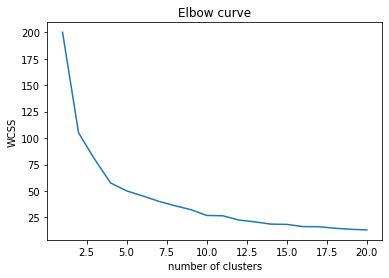

In [43]:
plt.plot(range(1,21),wcss)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
wcss

[200.0,
 104.96163315756873,
 80.08886132199619,
 57.55425863091106,
 50.10617286461218,
 45.359351260341576,
 40.254501112982126,
 36.12207712185807,
 32.406426739921976,
 26.881541874962835,
 26.589166153936322,
 22.55980621982447,
 20.812803718043973,
 18.70325458480856,
 18.440280923869476,
 16.384995831220134,
 16.235648341413885,
 14.829360599968362,
 13.78157367991332,
 13.217265327759984]

### 7.2 Selecting appropiate cluster from elbow curve

In [45]:
#selecting n_clusters = 4 as minimum deviation is observed in the curve at point 4

kmeans_model_selected = KMeans(n_clusters=4)
kmeans_model_selected.fit(scaled_crime_data_df)
kmeans_model_selected.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [49]:
crime_data_1 = crime_data.copy()

In [50]:
kmeans_cluster = pd.DataFrame(kmeans_model_selected.labels_)
crime_data_1['kmeans_cluster'] = kmeans_cluster
crime_data_1

,murder,assault,urban_pop,rape,kmeans_cluster
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,3


In [51]:
crime_data_1.groupby(crime_data_1.kmeans_cluster).mean()

,murder,assault,urban_pop,rape
kmeans_cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


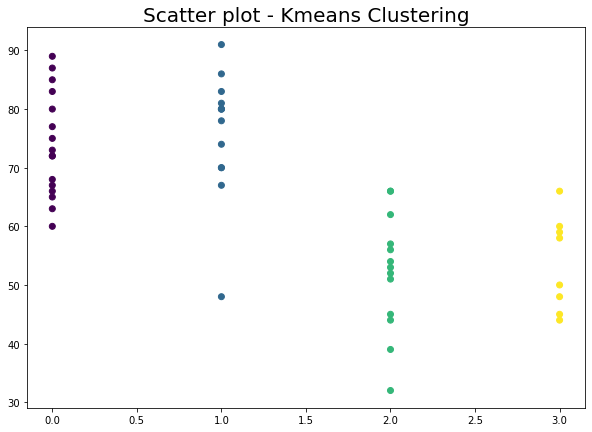

In [84]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data_1['kmeans_cluster'],crime_data_1['urban_pop'], c=kmeans_model_selected.labels_) 
plt.title('Scatter plot - Kmeans Clustering',fontsize = 20)
plt.show()

## 8. DBSCAN :

In [58]:
from sklearn.cluster import DBSCAN

### 8.1 Creating a dbscan model :

In [72]:
dbscan_model_1 = DBSCAN(eps=1,min_samples=4)
dbscan_model_1.fit(scaled_crime_data_df)

DBSCAN(eps=1, min_samples=4)

In [73]:
dbscan_model_2 = DBSCAN(eps=3,min_samples=7)
dbscan_model_2.fit(scaled_crime_data_df)

DBSCAN(eps=3, min_samples=7)

In [74]:
dbscan_model_3 = DBSCAN(eps=1,min_samples=10)
dbscan_model_3.fit(scaled_crime_data_df)

DBSCAN(eps=1, min_samples=10)

In [75]:
dbscan_cluster_1 = pd.DataFrame(dbscan_model_1.labels_,columns=['dbscan_cluster_1'])

In [76]:
dbscan_cluster_2 = pd.DataFrame(dbscan_model_2.labels_,columns=['dbscan_cluster_2'])

In [77]:
dbscan_cluster_3 = pd.DataFrame(dbscan_model_3.labels_,columns=['dbscan_cluster_3'])

In [78]:
crime_data_2 = crime_data.copy()

In [79]:
crime_data_2['dbscan_cluster_1'] = dbscan_cluster_1
crime_data_2['dbscan_cluster_2'] = dbscan_cluster_2
crime_data_2['dbscan_cluster_3'] = dbscan_cluster_3
crime_data_2

,murder,assault,urban_pop,rape,dbscan_cluster_1,dbscan_cluster_2,dbscan_cluster_3
0,13.2,236,58,21.2,0,0,-1
1,10.0,263,48,44.5,-1,0,-1
2,8.1,294,80,31.0,-1,0,-1
3,8.8,190,50,19.5,-1,0,-1
4,9.0,276,91,40.6,-1,0,-1
5,7.9,204,78,38.7,-1,0,-1
6,3.3,110,77,11.1,1,0,-1
7,5.9,238,72,15.8,-1,0,-1
8,15.4,335,80,31.9,-1,0,-1
9,17.4,211,60,25.8,-1,0,-1


In [80]:
crime_data_2.groupby(crime_data_2.dbscan_cluster_3).mean()

,murder,assault,urban_pop,rape,dbscan_cluster_1,dbscan_cluster_2
dbscan_cluster_3,,,,,,
-1,8.656757,192.000000,66.216216,22.862162,-0.081081,0.0
0,5.315385,110.307692,63.615385,16.592308,1.000000,0.0


In [81]:
crime_data_2[crime_data_2['dbscan_cluster_3']==0]

,murder,assault,urban_pop,rape,dbscan_cluster_1,dbscan_cluster_2,dbscan_cluster_3
11,2.6,120,54,14.2,1,0,0
13,7.2,113,65,21.0,1,0,0
14,2.2,56,57,11.3,1,0,0
15,6.0,115,66,18.0,1,0,0
22,2.7,72,66,14.9,1,0,0
25,6.0,109,53,16.4,1,0,0
26,4.3,102,62,16.5,1,0,0
34,7.3,120,75,21.4,1,0,0
35,6.6,151,68,20.0,1,0,0
37,6.3,106,72,14.9,1,0,0


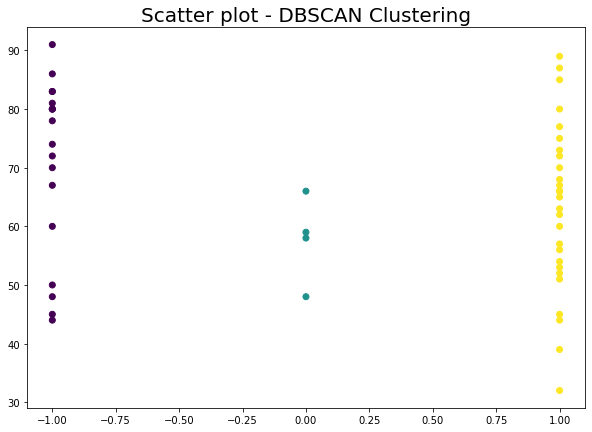

In [83]:
plt.figure(figsize=(10, 7))  
plt.scatter(crime_data_2['dbscan_cluster_1'],crime_data_1['urban_pop'], c=dbscan_model_1.labels_) 
plt.title('Scatter plot - DBSCAN Clustering',fontsize = 20)
plt.show()